# Simulation of heat diffusion in a graph

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [197]:
def make_grid(n, t_min, t_max_v, t_max_h):
    """Make the graph."""
    grid = np.zeros((n, n))
    grid[:, :] = t_min
    grid[:, 0] = t_max_v
    grid[:, n-1] = t_max_v
    grid[0, :] = t_max_h
    grid[n-1, :] = t_max_h
    return grid

In [198]:
def plot_grid(grid, ax, vmin=0, vmax=10):
    """Plot the temperatures of the grid."""
    sns.heatmap(grid, vmin=vmin, vmax=vmax, ax=ax, cbar=False)
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])

In [199]:
def one_step(grid, c):
    """Calculate next step of the temperatures of the grid using graph diffusion equation."""
    grid_old = grid.copy()
    n = grid.shape[0]
    for i in range(1, n-1):
        for j in range(1, n-1):
            grid[i, j] += c*(grid_old[i+1, j] + grid_old[i-1, j]
                             + grid_old[i, j+1] + grid_old[i, j-1]
                             - 4*grid[i, j])
    return grid

In [209]:
def whole_process(c=0.1, n=32, t_min=0, t_max_v=10, t_max_h=10, T=1024):
    grid = make_grid(n=n, t_min=t_min, t_max_v=t_max_v, t_max_h=t_max_h)
    fig, axes = plt.subplots(2, 4, figsize=(15, 6))
    plot_grid(grid, axes.reshape(-1)[0], vmin=t_min, vmax=max([t_max_h, t_max_v]))
    for i in range(1, T):
        grid = one_step(grid, c)
        if i % (T/8) == 0:
            plot_grid(grid, axes.reshape(-1)[int(i/(T/8))], vmin=t_min, vmax=max([t_max_h, t_max_v]))
    fig.colorbar(axes[0, 0].collections[0], ax=axes.ravel().tolist())
    plt.show()
    return grid

## a) First diffusion

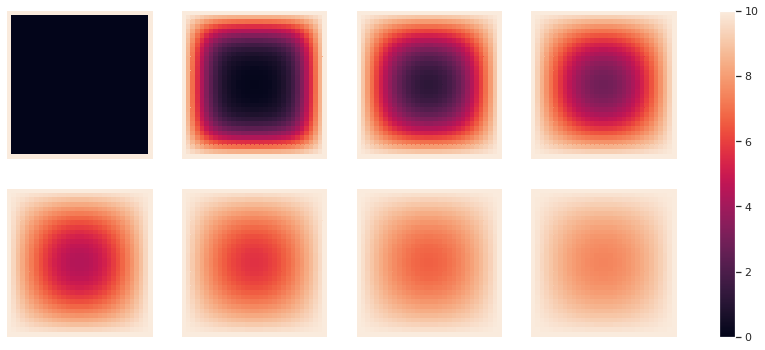

In [210]:
_ = whole_process()

## b) Second diffusion with different constant temperatures

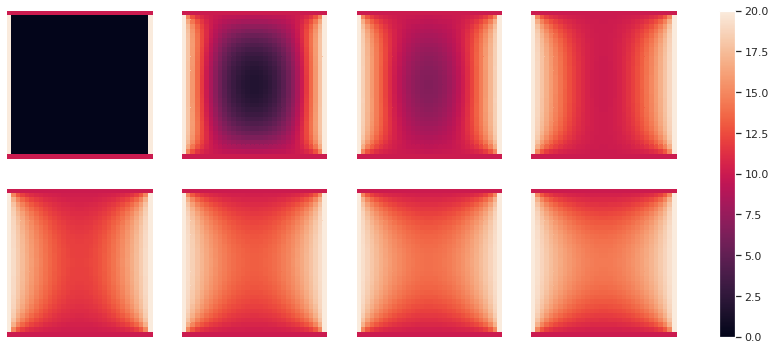

In [211]:
grid = whole_process(t_max_v=20, T=2048)

In [214]:
grid[int(32/2), int(32/2)]

14.63883376397161

We can see that the temperature approximates 15.